# Project: Predict  the likelihood of a new patient having heart disease in the future or not and How to prevent a patient from having heart disease.

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Fea">Feature Engineering/Data Preprocessing</a></li>
<li><a href="#mod">Modeling</a></li>
<li><a href="#modeva">Model Evaluation</a></li>
<li><a href="#hyp">HyperParameter Optimization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src='heartdisease.webp' width=400 height=400>

<a id='intro'></a>
## Introduction
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.
We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]
Before we jump into building a model, i will conduct exploratory data analysis on the dataset

Please note: For each step of the project, i am encouraged to add appropriate headers or subheaders and any discussions or explanations i see fit.  

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data= pd.read_csv('heart_disease_prediction.csv')

<a id='Fea'></a>
## Feature Engineering / Data Preprocessing

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

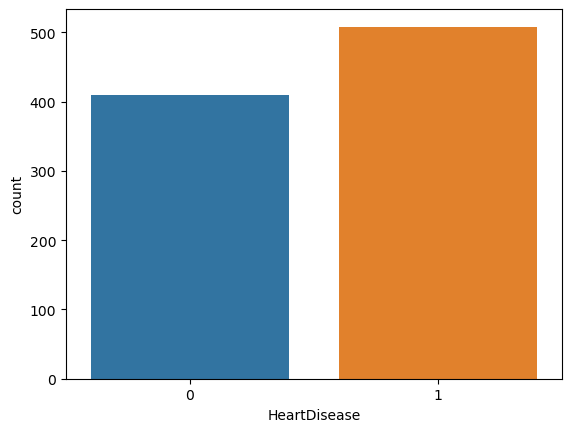

In [5]:
sns.countplot(data=data, x='HeartDisease')

<AxesSubplot:xlabel='Sex', ylabel='count'>

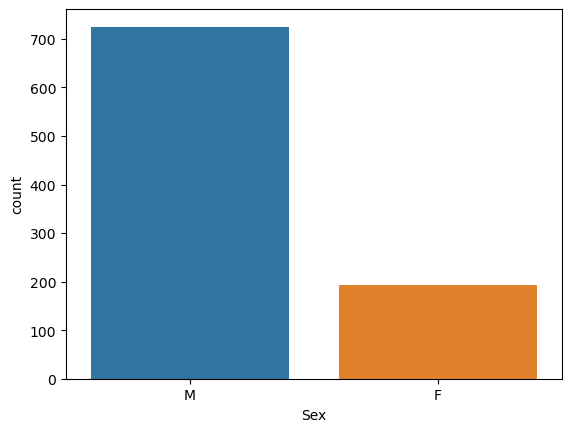

In [6]:
sns.countplot(data=data, x='Sex')

In [7]:
data.shape

(918, 12)

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
data['FastingBS'].unique()

array([0, 1], dtype=int64)

In [12]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [13]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [15]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [16]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
#convert the data types accordingly
for columns in  data.index:
    hd=data['HeartDisease']
    chest=data['ChestPainType']
    fast=data['FastingBS']
    RG=data['RestingECG']
    EA=data['ExerciseAngina']
    SS=data['ST_Slope']
    chest=chest.astype('category')
    fast=fast.astype('category')
    RG=RG.astype('category')
    EA=EA.astype('category')
    SS=SS.astype('category')
    hd=hd.astype('category')
    data['ChestPainType']=chest
    data['FastingBS']=fast
    data['RestingECG']=RG
    data['ExerciseAngina']=EA
    data['ST_Slope']=SS
    data['HeartDisease']=hd

In [18]:
data.dtypes

Age                  int64
Sex                 object
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease      category
dtype: object

<AxesSubplot:xlabel='Age'>

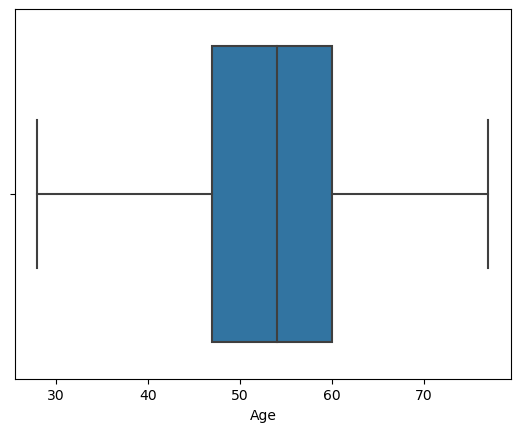

In [19]:
sns.boxplot(data=data, x='Age')

<AxesSubplot:xlabel='Cholesterol'>

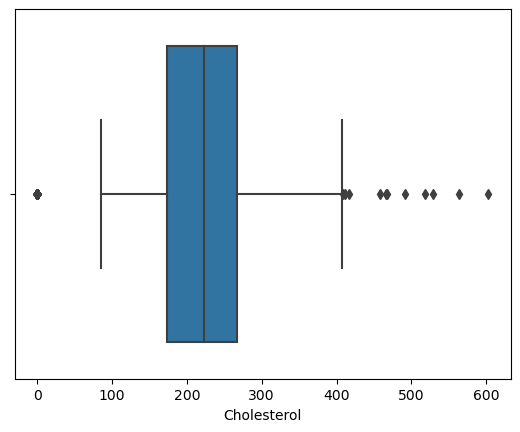

In [20]:
sns.boxplot(data=data, x='Cholesterol')

<img src='c_1.png' width=500 height=500>
<img src='c_2.png' width=500 height=500>
<img src='c_3.png' width=500 height=500>

<AxesSubplot:xlabel='MaxHR'>

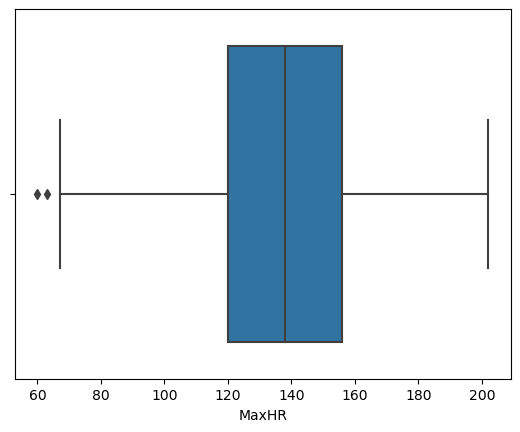

In [21]:
sns.boxplot(data=data, x='MaxHR')

## Feature Selection

In [22]:
select_features=data.groupby('HeartDisease').agg(
{ 'Age':'mean',
  'Cholesterol':'mean',
  'MaxHR':'mean',
  'RestingBP':'mean'
})
select_features

,Age,Cholesterol,MaxHR,RestingBP
HeartDisease,,,,
0,50.551220,227.121951,148.151220,130.180488
1,55.899606,175.940945,127.655512,134.185039


<Figure size 400x400 with 0 Axes>

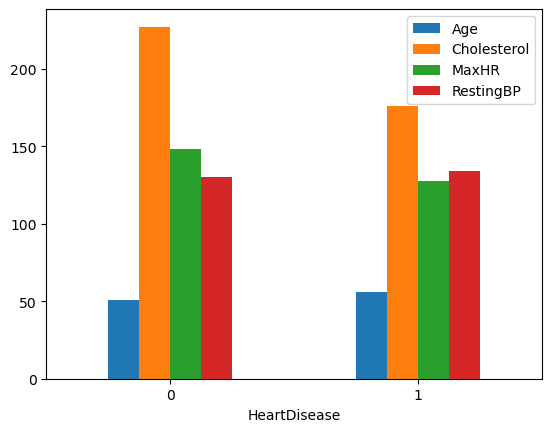

In [23]:
plt.figure(figsize=[4,4])
select_features.plot(kind='bar')
plt.xticks(rotation=0);

In [24]:
#show the features with the highest mean for  both classes of heart disease
np.abs(select_features.iloc[0] - select_features.iloc[1])

Age             5.348387
Cholesterol    51.181006
MaxHR          20.495708
RestingBP       4.004552
dtype: float64

In [25]:
dummies= pd.get_dummies(data[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina',
                            'ST_Slope']])

In [26]:
df= pd.concat([data, dummies], axis=1)

In [27]:
df= df.drop(columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
           ,axis=1)
df.head(3)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1


In [28]:
features= df.drop(columns=['HeartDisease'], axis=1)
response= df['HeartDisease']

In [29]:
features.head(3)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1


In [30]:
response.head(3)

0    0
1    1
2    0
Name: HeartDisease, dtype: category
Categories (2, int64): [0, 1]

In [31]:
x=features
y=response

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, shuffle=True,
                                                 random_state=42)

scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [32]:
#Perform GridsearchCV to tune best-fit LR model
param = {'C': [10**-2, 10**-1, 10**0, 10**1,10**2]}

lr_model= LogisticRegression(penalty='l1', solver='liblinear')

gs_model=GridSearchCV(estimator=lr_model, param_grid=param)

gs_model.fit(x_train_scaled, y_train)

#Train a model with best parameters
model=LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')

model.fit(x_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [33]:
coefficients= model.coef_[0]
coefficients

array([ 0.1378584 ,  0.02178539, -0.50908304, -0.08941092,  0.48120992,
       -0.53287784,  0.00104544,  0.73529189,  0.        , -0.0089351 ,
        0.05968494, -0.28806619,  0.13121587,  0.07633292,  0.        ,
       -0.08043336, -0.21085824,  0.31697187,  0.        ,  0.64955838,
       -0.54874106])

In [34]:
coefficients!=0

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True])

In [35]:
good_features= pd.Series(x.columns)[list(coefficients !=0)]
good_features

0                   Age
1             RestingBP
2           Cholesterol
3                 MaxHR
4               Oldpeak
5                 Sex_F
6                 Sex_M
7     ChestPainType_ASY
9     ChestPainType_NAP
10     ChestPainType_TA
11          FastingBS_0
12          FastingBS_1
13       RestingECG_LVH
15        RestingECG_ST
16     ExerciseAngina_N
17     ExerciseAngina_Y
19        ST_Slope_Flat
20          ST_Slope_Up
dtype: object

In [36]:
select_features_again=df.groupby('HeartDisease').agg(
{ 'Age':'mean',
  'Cholesterol':'mean',
  'MaxHR':'mean',
  'RestingBP':'mean',
 'ST_Slope_Up':'mean',
 'ST_Slope_Flat':'mean',
 'ExerciseAngina_Y':'mean',
 'ExerciseAngina_N':'mean',
 'RestingECG_ST':'mean',
 'RestingECG_LVH':'mean',
 'FastingBS_1':'mean',
 'FastingBS_0':'mean',
 'ChestPainType_TA':'mean',
 'ChestPainType_NAP':'mean',
 'ChestPainType_ASY':'mean',
 'Sex_F':'mean',
 'Sex_M':'mean',
 'Oldpeak':'mean',
 'Oldpeak':'mean',
 'MaxHR':'mean',
 'Cholesterol':'mean',
 'RestingBP':'mean',
 'Age':'mean'
 
})
select_features_again

,Age,Cholesterol,MaxHR,RestingBP,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,ExerciseAngina_N,RestingECG_ST,RestingECG_LVH,FastingBS_1,FastingBS_0,ChestPainType_TA,ChestPainType_NAP,ChestPainType_ASY,Sex_F,Sex_M,Oldpeak
HeartDisease,,,,,,,,,,,,,,,,,,
0,50.551220,227.121951,148.151220,130.180488,0.773171,0.192683,0.134146,0.865854,0.148780,0.200000,0.107317,0.892683,0.063415,0.319512,0.253659,0.348780,0.651220,0.408049
1,55.899606,175.940945,127.655512,134.185039,0.153543,0.750000,0.622047,0.377953,0.230315,0.208661,0.334646,0.665354,0.039370,0.141732,0.771654,0.098425,0.901575,1.274213


In [37]:
np.abs(select_features_again.iloc[0] - select_features_again.iloc[1])

Age                   5.348387
Cholesterol          51.181006
MaxHR                20.495708
RestingBP             4.004552
ST_Slope_Up           0.619627
ST_Slope_Flat         0.557317
ExerciseAngina_Y      0.487901
ExerciseAngina_N      0.487901
RestingECG_ST         0.081534
RestingECG_LVH        0.008661
FastingBS_1           0.227329
FastingBS_0           0.227329
ChestPainType_TA      0.024045
ChestPainType_NAP     0.177780
ChestPainType_ASY     0.517995
Sex_F                 0.250355
Sex_M                 0.250355
Oldpeak               0.866164
dtype: float64

In [38]:
df=df.drop(columns=['ST_Slope_Down','Sex_F','Sex_M'],axis=1)

In [39]:
df.head(3)
#df.to_csv('train.csv')

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,1,0,0,1,0,1,0,1,0
2,37,130,283,98,0.0,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [40]:
x=df.drop(columns=['HeartDisease'], axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, shuffle=True,
                                                 random_state=42)

scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [41]:
df.shape[1]

19

<a id='mod'></a>
## Modeling

In [42]:
#initiate the logistic regression model
lr_model= LogisticRegression()

#fit the model
lr_model.fit(x_train_scaled, y_train)

predictions= lr_model.predict(x_test_scaled)

probabilities= lr_model.predict_proba(x_test_scaled)
probabilities[0:12]
prob= lr_model.predict_proba(x_test_scaled)[:,1]

<a id='modeva'></a>
## Evaluation

In [43]:
#training accuracy
training_accuracy= lr_model.score(x_train_scaled, y_train)

#test_accuracy
test_accuracy= lr_model.score(x_test_scaled, y_test)

mse= mean_squared_error(y_test, predictions, squared=False)

print('training_accuracy:',training_accuracy)
print('test_accuracy:',test_accuracy)
print('Mse:',mse)

training_accuracy: 0.8651226158038147
test_accuracy: 0.8641304347826086
Mse: 0.3686048903872428


In [44]:
#use confusion_matrix
cm= confusion_matrix(y_test, predictions)
cr= classification_report(y_test, predictions)
print(cm)

[[67 10]
 [15 92]]


In [45]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



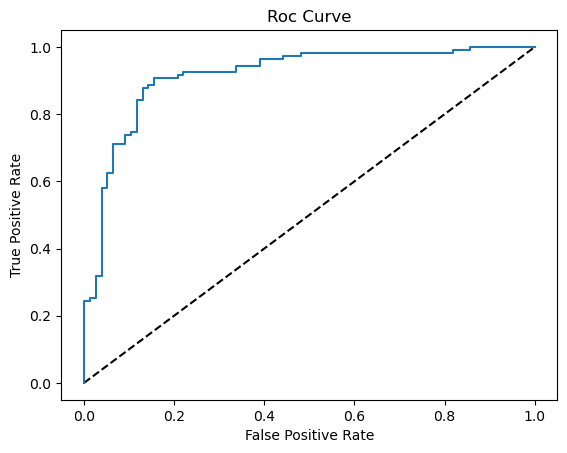

In [46]:
#evaluate with roc curve

from sklearn.metrics import roc_curve

fpr,tpr,thresholds= roc_curve(y_test, prob)

plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve');

In [47]:
#get the auc score 
from sklearn.metrics import roc_auc_score

auc_score= roc_auc_score(y_test, prob)
auc_score

0.9146741109357932

In [48]:
import pickle

In [49]:
pickle_out= open('lr_model.pkl','wb')
pickle.dump(lr_model,pickle_out )
pickle_out.close()

In [50]:
filename= 'predictor_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

In [51]:
input_data = (40,140,289,172,0,0,0,1,0,0,1,0,0,1,0,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Has no heart disease')
else:
  print('Has heart disease')

[0]
Has no heart disease


In [52]:
x.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [53]:
x.shape

(918, 18)